#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

O dataset glass contém 7 classes. Será feita classificação um contra todos para a classe 1.

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={'1':1, '2':-1, '3':-1, '4':-1, '5':-1, '6':-1, '7':-1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

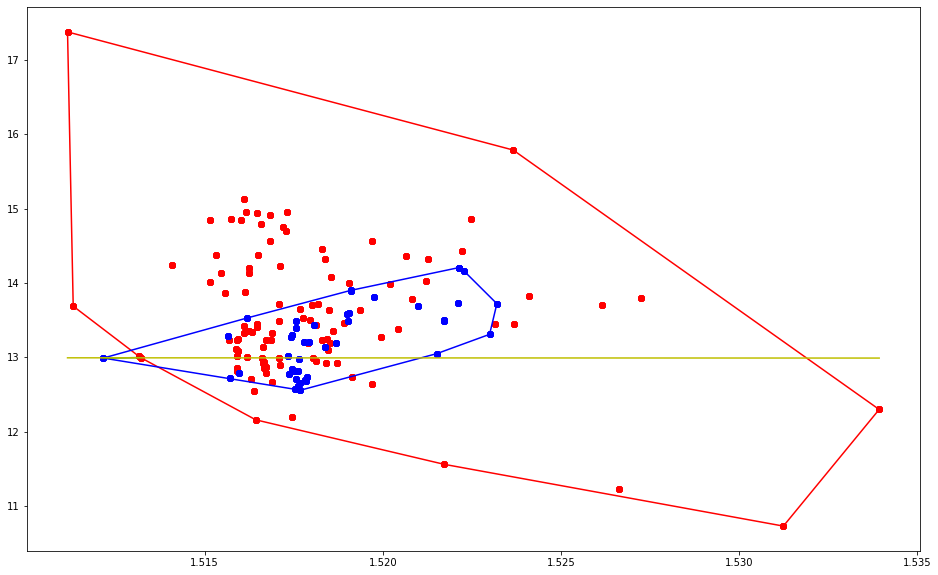

In [6]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.263158,0.625000,0.263158,0.413793
1,0.250000,0.857143,0.250000,0.344828
2,0.190476,0.444444,0.190476,0.241379
3,0.238095,0.500000,0.238095,0.275862
4,0.333333,0.777778,0.333333,0.448276


#### Resultados do teste

In [9]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.390244,0.615385,0.390244,0.461538


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [10]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

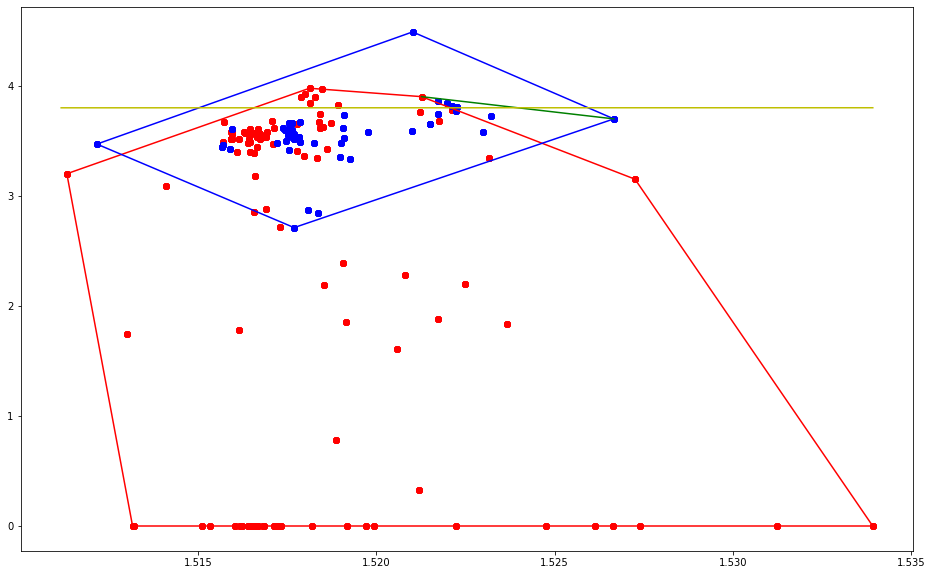

In [11]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [12]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [13]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.241379,1.0,0.241379,0.241379
1,0.413793,1.0,0.413793,0.413793
2,0.448276,1.0,0.448276,0.448276
3,0.172414,1.0,0.172414,0.172414
4,0.275862,1.0,0.275862,0.275862


#### Resultados do teste

In [14]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.353846,1.0,0.353846,0.353846


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [15]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \


#### Plotando classificador

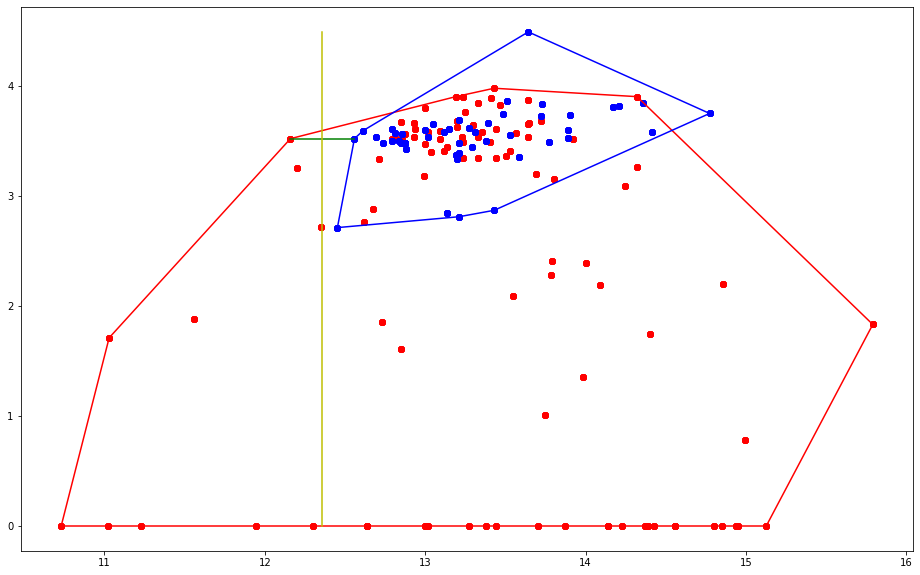

In [16]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [17]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [18]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.758621
1,NaN,0.0,NaN,0.689655
2,NaN,0.0,NaN,0.655172
3,NaN,0.0,NaN,0.655172
4,NaN,0.0,NaN,0.689655


#### Resultados do teste

In [19]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,NaN,0.0,NaN,0.661538


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [20]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

#### Resultados da validação cruzada com 5 folds

In [21]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.800000,0.888889,0.800000,0.896552
1,0.416667,0.714286,0.416667,0.689655
2,0.625000,0.625000,0.625000,0.793103
3,0.846154,0.916667,0.846154,0.896552
4,0.900000,0.818182,0.900000,0.896552


#### Resultados do teste

In [22]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.6,0.857143,0.6,0.769231
